In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [3]:
df = pd.read_csv(csv_path)

In [4]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [5]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [6]:
TRAIN_SPLIT = 300000

In [7]:
tf.random.set_seed(13)

In [8]:
# ОДНОМЕРНОЕ ПРОГНОЗИРОВАНИЕ ЗНАЧЕНИЯ ПО ЕГО ЖЕ ЗНАЧЕНИЯМ

In [9]:
uni_data = df['T (degC)']
uni_data.index = df['Date Time']
uni_data.head()

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
Name: T (degC), dtype: float64

In [10]:
uni_data

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
                       ... 
31.12.2016 23:20:00   -4.05
31.12.2016 23:30:00   -3.35
31.12.2016 23:40:00   -3.16
31.12.2016 23:50:00   -4.23
01.01.2017 00:00:00   -4.82
Name: T (degC), Length: 420551, dtype: float64

array([<AxesSubplot:xlabel='Date Time'>], dtype=object)

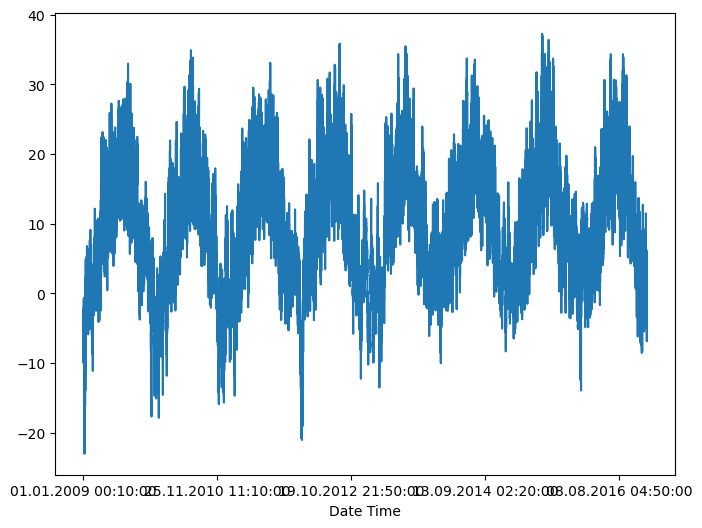

In [11]:
uni_data.plot(subplots=True)

In [12]:
uni_data = uni_data.values

In [13]:
uni_data

array([-8.02, -8.41, -8.51, ..., -3.16, -4.23, -4.82])

In [14]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [15]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [16]:
uni_data

array([-1.99766294, -2.04281897, -2.05439744, ..., -1.43494935,
       -1.55883897, -1.62715193])

In [17]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [18]:
x_train_uni[0][0:5]

array([[-1.99766294],
       [-2.04281897],
       [-2.05439744],
       [-2.0312405 ],
       [-2.02660912]])

In [19]:
x_train_uni[1][0:5]

array([[-2.04281897],
       [-2.05439744],
       [-2.0312405 ],
       [-2.02660912],
       [-2.00113649]])

In [20]:
x_train_uni[0][1:6] == x_train_uni[1][0:5] # каждый батч со сдвигом на один временной промежуток

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [21]:
# временные промежутки создаются для каждого наблюдения

In [22]:
print ('Single window of past history')
print (x_train_uni[3])
print ('\n Target temperature to predict')
print (y_train_uni[3])

Single window of past history
[[-2.0312405 ]
 [-2.02660912]
 [-2.00113649]
 [-1.95134907]
 [-1.95134907]
 [-1.98492663]
 [-2.04513467]
 [-2.08334362]
 [-2.09723778]
 [-2.09376424]
 [-2.09144854]
 [-2.07176515]
 [-2.07176515]
 [-2.07639653]
 [-2.08913285]
 [-2.09260639]
 [-2.10418486]
 [-2.10418486]
 [-2.09492208]
 [-2.10997409]]

 Target temperature to predict
-2.1169211757877098


In [23]:
def create_time_steps(length):
    return list(range(-length, 0))

In [24]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, 
                     label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

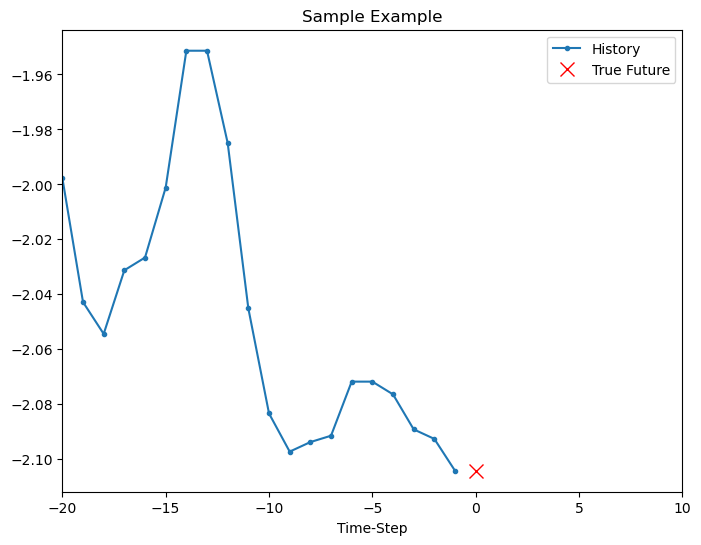

In [25]:
for i in range(0,1):
    show_plot([x_train_uni[i], y_train_uni[i]], 0, 'Sample Example')

In [26]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from 'C:\\Users\\TimurRashitov\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

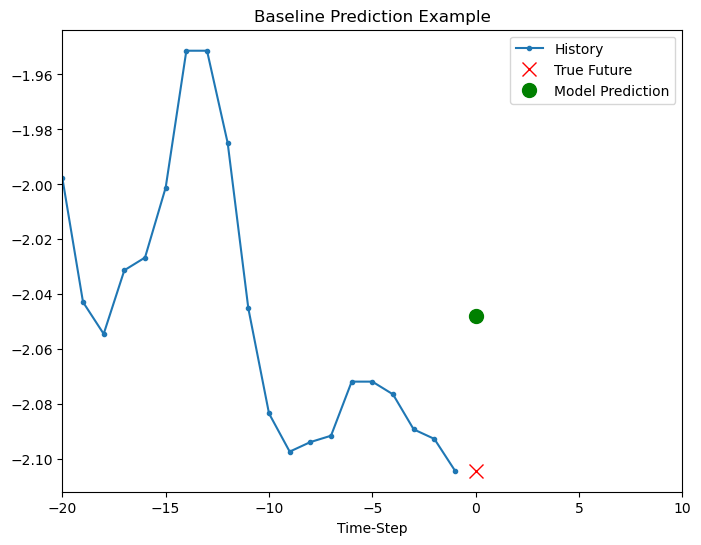

In [27]:
# базовое предсказание на основе среднего по всей последовательности
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [28]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [29]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [30]:
x_train_uni.shape[-2:]

(20, 1)

In [31]:
for i in train_univariate:
    break

In [32]:
i[0].shape

TensorShape([256, 20, 1])

In [50]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

8/8 [==============================] - 0s 2ms/step
(256, 1)


In [34]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

In [35]:
simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 4s 11ms/step - loss: 0.2999 - val_loss: 0.0704
Epoch 2/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0723 - val_loss: 0.0322
Epoch 3/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0401 - val_loss: 0.0252
Epoch 4/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0346 - val_loss: 0.0224
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0249 - val_loss: 0.0213
Epoch 6/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0278 - val_loss: 0.0212
Epoch 7/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0255 - val_loss: 0.0194
Epoch 8/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0242 - val_loss: 0.0194
Epoch 9/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0239 - val_loss: 0.0179
Epoch 10/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0217 - val_loss: 0.016

In [46]:
x[0].numpy().shape

(20, 1)

In [45]:
y[0].numpy().shape

()

In [49]:
simple_lstm_model.predict(x)[0]

8/8 [==============================] - 0s 2ms/step


array([1.3399515], dtype=float32)

8/8 [==============================] - 0s 2ms/step


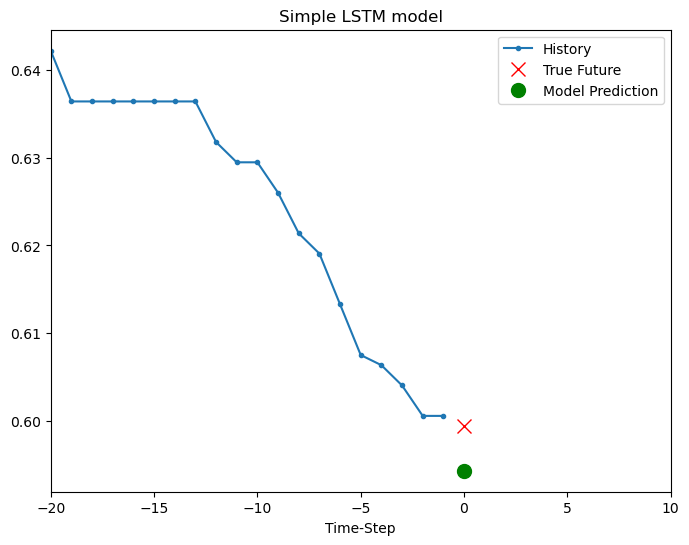

8/8 [==============================] - 0s 2ms/step


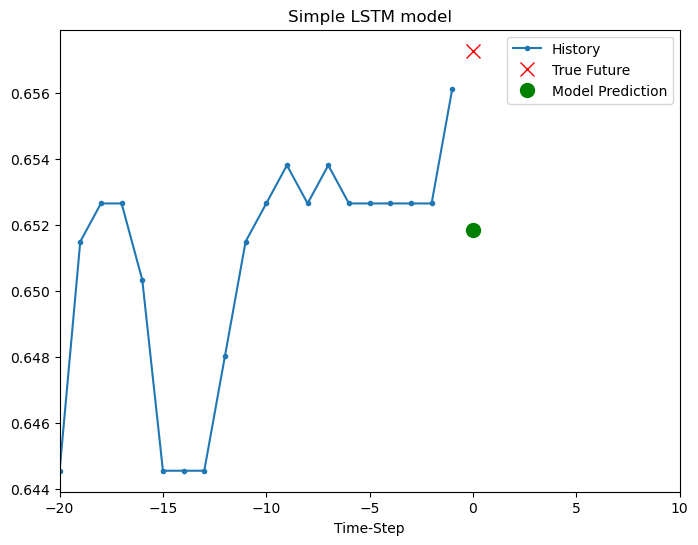

8/8 [==============================] - 0s 2ms/step


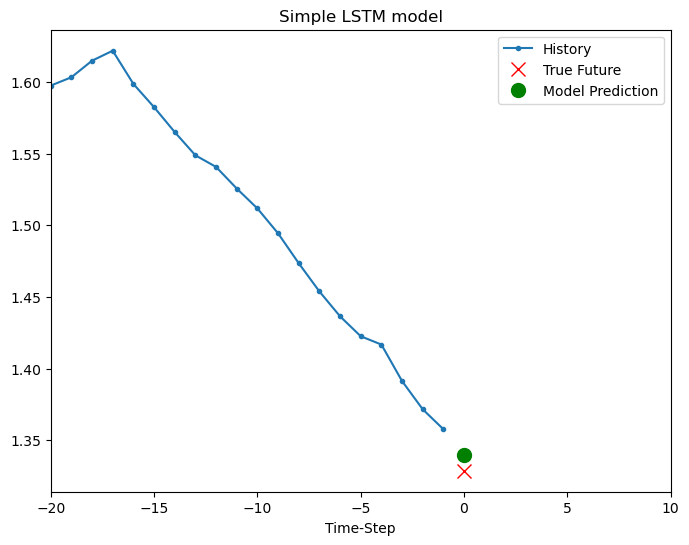

In [36]:
for x, y in val_univariate.take(3):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

In [37]:
# МНОГОМЕРНОЕ ПРОГНОЗИРОВАНИЕ ЗНАЧЕНИЯ

<AxesSubplot:>

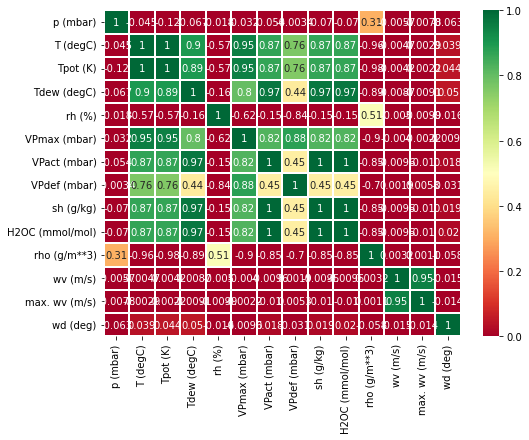

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

In [39]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [40]:
features_considered = ['rho (g/m**3)', 'H2OC (mmol/mol)', 'T (degC)']

In [41]:
features = df[features_considered]
features.index = df['Date Time']
features.head()

,rho (g/m**3),H2OC (mmol/mol),T (degC)
Date Time,,,
01.01.2009 00:10:00,1307.75,3.12,-8.02
01.01.2009 00:20:00,1309.80,3.03,-8.41
01.01.2009 00:30:00,1310.24,3.02,-8.51
01.01.2009 00:40:00,1309.19,3.08,-8.31
01.01.2009 00:50:00,1309.00,3.09,-8.27


<AxesSubplot:>

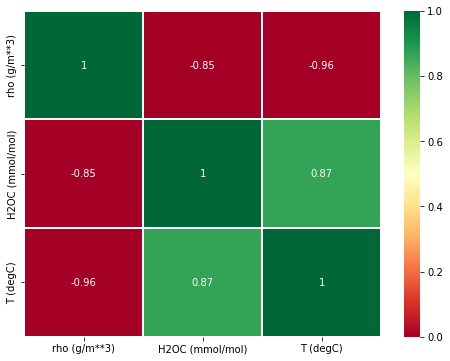

In [42]:
sns.heatmap(features.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

array([<AxesSubplot:xlabel='Date Time'>, <AxesSubplot:xlabel='Date Time'>,
       <AxesSubplot:xlabel='Date Time'>], dtype=object)

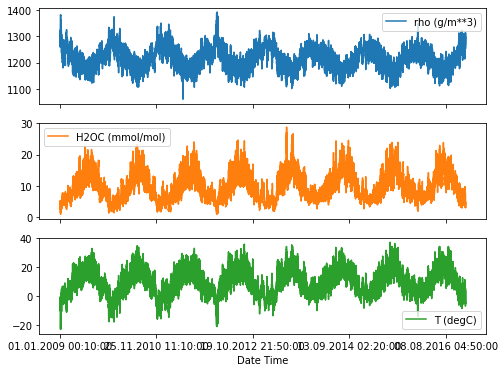

In [43]:
features.plot(subplots=True)

In [44]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [45]:
dataset = (dataset-data_mean)/data_std

In [46]:
dataset

array([[ 2.2350791 , -1.50236955, -1.99766294],
       [ 2.28524007, -1.52339795, -2.04281897],
       [ 2.29600633, -1.52573444, -2.05439744],
       ...,
       [ 1.76136375, -1.46498572, -1.43494935],
       [ 1.88786728, -1.48367764, -1.55883897],
       [ 1.95686921, -1.47666817, -1.62715193]])

In [47]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)


In [48]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [49]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (120, 3)


In [50]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [51]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [52]:
x_train_single.shape[-2:]

(120, 3)

In [53]:
for i in train_data_single:
    break

2022-11-25 21:51:57.499443: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [54]:
i[0].shape

TensorShape([256, 120, 3])

In [55]:
i[1].shape

TensorShape([256])

In [56]:
for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

(256, 1)


In [57]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

In [58]:
EVALUATION_INTERVAL

200

In [59]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/10
200/200 [==============================] - 4s 12ms/step - loss: 0.3181 - val_loss: 0.2826
Epoch 2/10
200/200 [==============================] - 2s 11ms/step - loss: 0.2449 - val_loss: 0.2834
Epoch 3/10
200/200 [==============================] - 2s 10ms/step - loss: 0.2771 - val_loss: 0.2629
Epoch 4/10
200/200 [==============================] - 2s 10ms/step - loss: 0.2686 - val_loss: 0.2782
Epoch 5/10
200/200 [==============================] - 2s 10ms/step - loss: 0.2415 - val_loss: 0.2590
Epoch 6/10
200/200 [==============================] - 2s 11ms/step - loss: 0.2427 - val_loss: 0.2651
Epoch 7/10
200/200 [==============================] - 2s 11ms/step - loss: 0.2520 - val_loss: 0.2721
Epoch 8/10
200/200 [==============================] - 2s 10ms/step - loss: 0.2286 - val_loss: 0.2944
Epoch 9/10
200/200 [==============================] - 2s 10ms/step - loss: 0.2615 - val_loss: 0.2546
Epoch 10/10
200/200 [==============================] - 2s 10ms/step - loss: 0.2524 - val_lo

In [60]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

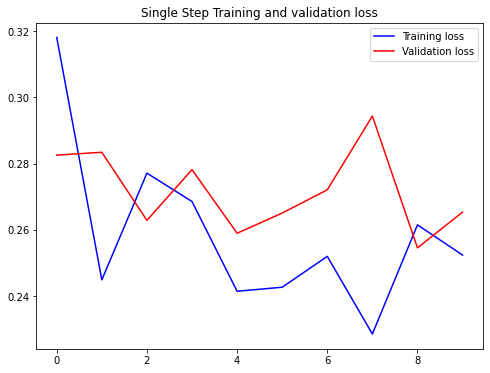

In [61]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

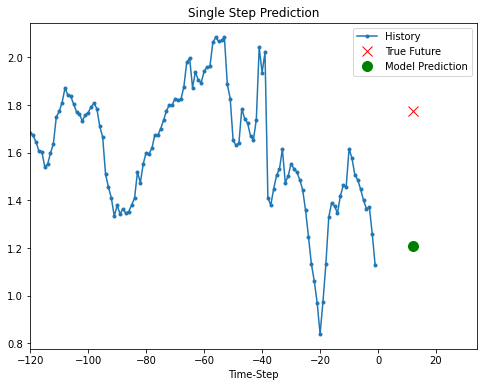

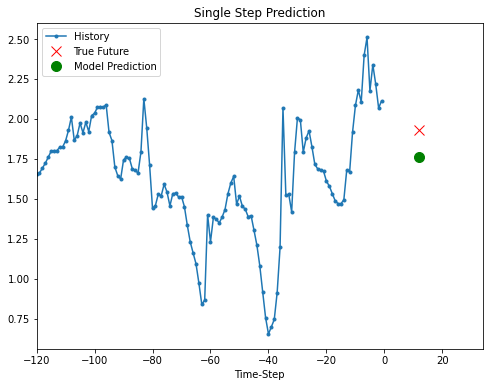

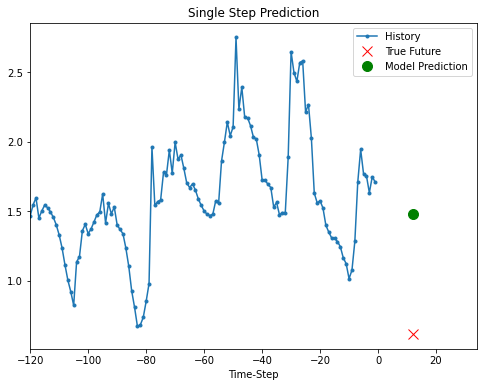

In [62]:
for x, y in val_data_single.take(3):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
    plot.show()

In [63]:
# МНОГОМЕРНОЕ ПРОГНОЗИРОВАНИЕ ИНТЕРВАЛА

In [64]:
future_target = 72
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [65]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 3)

 Target temperature to predict : (72,)


In [66]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [67]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

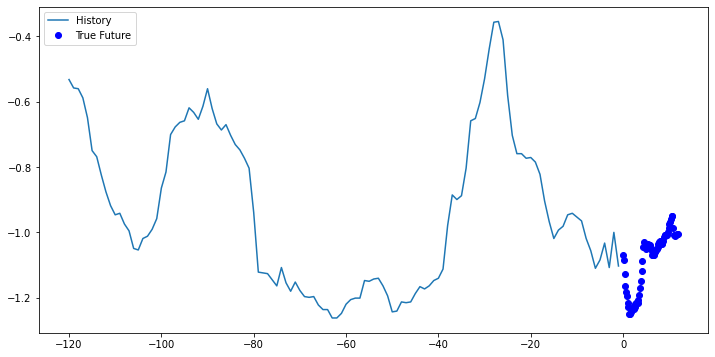

2022-11-25 21:52:35.077049: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [68]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [69]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [70]:
for x, y in val_data_multi.take(1):
    print (multi_step_model.predict(x).shape)

(256, 72)


In [71]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

In [72]:
EVALUATION_INTERVAL

200

In [73]:

multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 50s 237ms/step - loss: 0.6114 - val_loss: 0.3029
Epoch 2/10
200/200 [==============================] - 47s 236ms/step - loss: 16.9142 - val_loss: 0.2584
Epoch 3/10
200/200 [==============================] - 48s 242ms/step - loss: 0.2649 - val_loss: 0.2385
Epoch 4/10
200/200 [==============================] - 47s 234ms/step - loss: 0.2275 - val_loss: 0.2158
Epoch 5/10
200/200 [==============================] - 47s 236ms/step - loss: 0.1970 - val_loss: 0.2090
Epoch 6/10
200/200 [==============================] - 47s 236ms/step - loss: 0.1974 - val_loss: 0.2058
Epoch 7/10
200/200 [==============================] - 47s 235ms/step - loss: 0.1917 - val_loss: 0.1870
Epoch 8/10
200/200 [==============================] - 46s 231ms/step - loss: 0.1749 - val_loss: 0.1942
Epoch 9/10
200/200 [==============================] - 47s 237ms/step - loss: 0.1961 - val_loss: 0.1875
Epoch 10/10
200/200 [==============================] - 47s 236ms/step - 

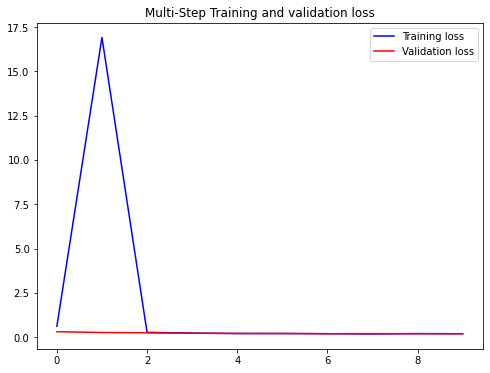

In [74]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

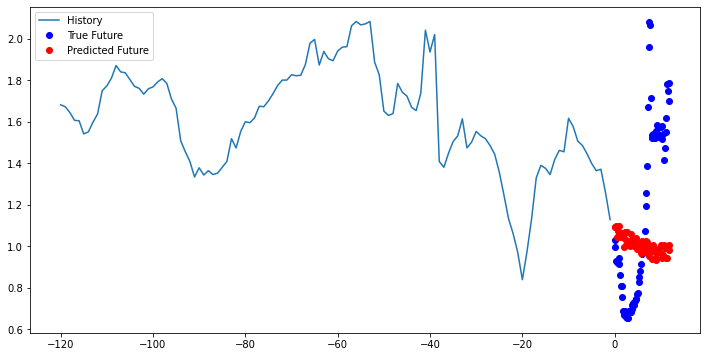

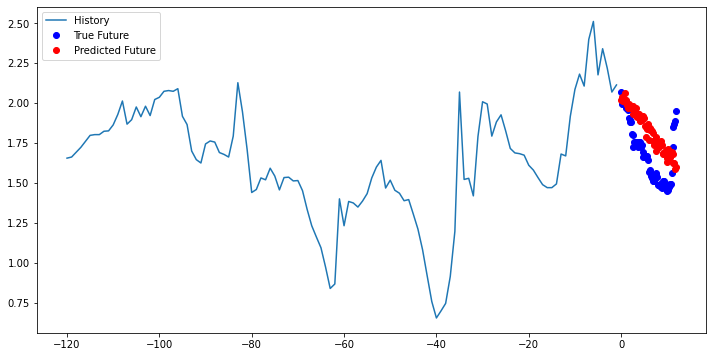

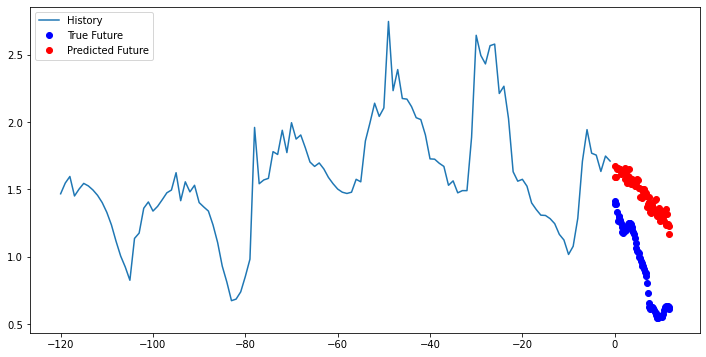

In [75]:
for x, y in val_data_multi.take(3):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])